In [4]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np

import salishsea_tools

import datetime
import os

import nowcast
import nowcast.figures.shared

from matplotlib import gridspec

from salishsea_tools import visualisations as vis
from salishsea_tools import (teos_tools, tidetools, viz_tools, geo_tools)

%matplotlib inline

import scipy.io as sio

from nowcast.figures.research import tracer_thalweg_and_surface

In [2]:
"""
def tracer_thalweg_and_surface(var, bathy, lons, lats, mesh_mask, coastline):

    lon_range = (-124.4, -122.4)
    lat_range = (48, 49.6)
    si, ei = 150, 610
    sj, ej = 20, 370   
    
    # These need to be set depending on tracer type
    vmin = 6
    vmax = 34
    clevels = np.arange(vmin, vmax, 1)
    
    fig = plt.figure(figsize=(16, 8)) 
    gs = gridspec.GridSpec(1, 2, width_ratios=[1.28, 1]) 
    ax1 = plt.subplot(gs[0])
    ax2 = plt.subplot(gs[1])
    
    cmap = plt.get_cmap('jet')
    
    cbar = vis.contour_thalweg(ax1, var, bathy, lons, lats, mesh_mask, 'gdept', clevels=clevels, cmap=cmap)
    ax1.set_ylim([450,0])
    cbar.remove()
        
    viz_tools.set_aspect(ax1)

    lons = lons[si:ei, sj:ej]
    lats = lats[si:ei, sj:ej]
    var = var[0,si:ei, sj:ej]
    var_ma = np.ma.masked_values(var[:, :], 0)
    
    nowcast.figures.shared.plot_map(ax2,coastline, lon_range=lon_range, lat_range=lat_range)
    mesh = ax2.contourf(lons, lats, var_ma, levels=clevels, cmap=cmap, extend='both')
    
    fig.colorbar(mesh, ax=ax2, fraction=0.034, pad=0.04) 
    ax2.set_xlabel('Longitude')
    ax2.set_ylabel('Latitude')
    plt.tight_layout()
    
    return(fig)
"""

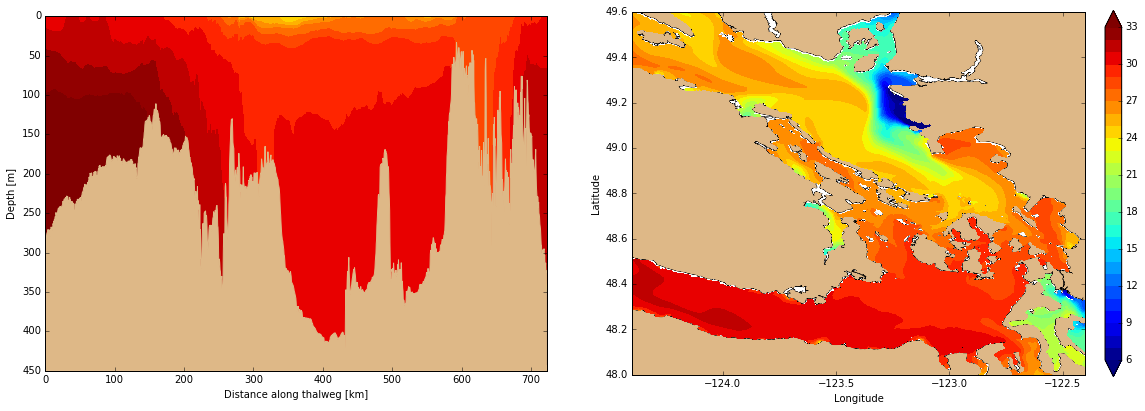

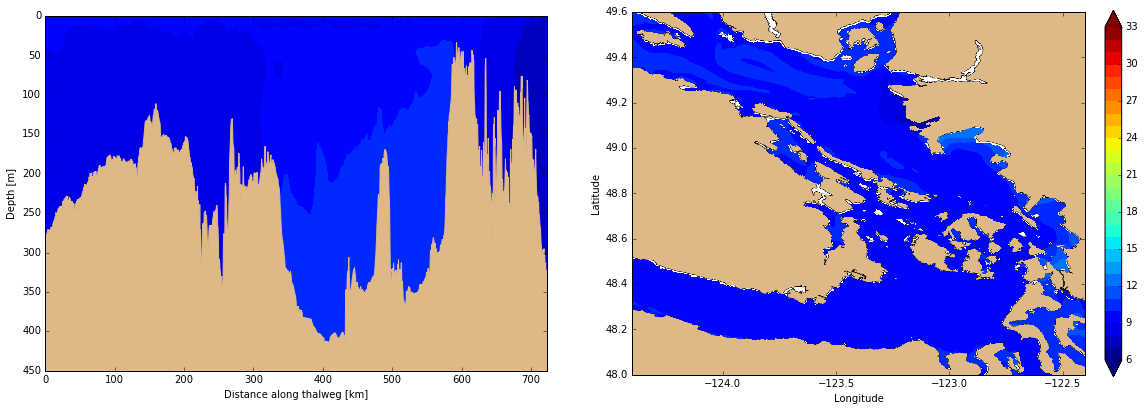

In [8]:
mesh_mask = nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/mesh_mask_SalishSea2.nc')

coastline = sio.loadmat('/ocean/rich/more/mmapbase/bcgeo/PNW.mat')

grid_B = nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc')
bathy, lons, lats = tidetools.get_bathy_data(grid_B)

grid_T = nc.Dataset('/results/SalishSea/nowcast/01apr16/SalishSea_1d_20160401_20160401_grid_T.nc')

var = grid_T.variables['vosaline'][0,:,:,:]

thalweg_and_surface_plot = tracer_thalweg_and_surface.tracer_thalweg_and_surface(var, bathy, lons, lats, mesh_mask, coastline)
plt.show(thalweg_and_surface_plot)


var = grid_T.variables['votemper'][0,:,:,:]

thalweg_and_surface_plot = tracer_thalweg_and_surface.tracer_thalweg_and_surface(var, bathy, lons, lats, mesh_mask, coastline)
plt.show(thalweg_and_surface_plot)

In [7]:
grid_T


<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CF-1.1
    production: An IPSL model
    TimeStamp: 01/04/2016 13:04:01 -0700
    file_name: SalishSea_1d_20160401_20160401_grid_T.nc
    history: Fri Apr  1 13:33:30 2016: ncks -4 -L4 -O SalishSea_1d_20160401_20160401_grid_T.nc SalishSea_1d_20160401_20160401_grid_T.nc
    NCO: 4.4.2
    dimensions(sizes): deptht(40), y(898), x(398), time_counter(1), tbnds(2)
    variables(dimensions): float32 deptht(deptht), float32 nav_lat(y,x), float32 nav_lon(y,x), float32 rain_rate(time_counter,y,x), float32 sossheig(time_counter,y,x), float64 time_counter(time_counter), float64 time_counter_bnds(time_counter,tbnds), float32 vosaline(time_counter,deptht,y,x), float32 votemper(time_counter,deptht,y,x)
    groups: 